In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
x = [[12,0],[14.5,1],[10,2],[18,0],[8.5,4],[15,1],[22,0],[11,5],[13,2],[20.5,1],[24,2],[16,3],[12.5,0],[28,0],[9,6],[25,1],[14,4],[19,2],[10.5,2],[26.5,2],[15.5,5],[17,3]]
x = np.array(x)
y = [0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1]
y = np.array(y)

In [17]:
#Normalisation
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x_norm = (x - x_mean) / x_std
print(x_norm)

[[-0.78197306 -1.19089486]
 [-0.34086005 -0.62133645]
 [-1.13486347 -0.05177804]
 [ 0.27669816 -1.19089486]
 [-1.39953127  1.08733878]
 [-0.25263745 -0.62133645]
 [ 0.98247897 -1.19089486]
 [-0.95841826  1.65689719]
 [-0.60552786 -0.05177804]
 [ 0.71781117 -0.62133645]
 [ 1.33536938 -0.05177804]
 [-0.07619225  0.51778037]
 [-0.69375046 -1.19089486]
 [ 2.0411502  -1.19089486]
 [-1.31130867  2.2264556 ]
 [ 1.51181459 -0.62133645]
 [-0.42908265  1.08733878]
 [ 0.45314336 -0.05177804]
 [-1.04664087 -0.05177804]
 [ 1.77648239 -0.05177804]
 [-0.16441485  1.65689719]
 [ 0.10025296  0.51778037]]


In [18]:
#adding bias column
x_final = np.hstack((np.ones((x_norm.shape[0], 1)), x_norm))
print(x_final)

[[ 1.         -0.78197306 -1.19089486]
 [ 1.         -0.34086005 -0.62133645]
 [ 1.         -1.13486347 -0.05177804]
 [ 1.          0.27669816 -1.19089486]
 [ 1.         -1.39953127  1.08733878]
 [ 1.         -0.25263745 -0.62133645]
 [ 1.          0.98247897 -1.19089486]
 [ 1.         -0.95841826  1.65689719]
 [ 1.         -0.60552786 -0.05177804]
 [ 1.          0.71781117 -0.62133645]
 [ 1.          1.33536938 -0.05177804]
 [ 1.         -0.07619225  0.51778037]
 [ 1.         -0.69375046 -1.19089486]
 [ 1.          2.0411502  -1.19089486]
 [ 1.         -1.31130867  2.2264556 ]
 [ 1.          1.51181459 -0.62133645]
 [ 1.         -0.42908265  1.08733878]
 [ 1.          0.45314336 -0.05177804]
 [ 1.         -1.04664087 -0.05177804]
 [ 1.          1.77648239 -0.05177804]
 [ 1.         -0.16441485  1.65689719]
 [ 1.          0.10025296  0.51778037]]


In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:
def cost_function(X, Y, W):
  m = Y.shape[0]
  pred = sigmoid(np.dot(X, W))
  cost = (-1/m) * np.sum(Y * np.log(pred) + (1 - Y) * np.log(1 - pred))
  return cost

In [23]:
#Gradient Descent
def gradient_descent(X, Y, W, learning_rate, iterations):
  m = Y.shape[0]
  cost_history = []
  for i in range(iterations):
    pred = sigmoid(np.dot(X, W))
    gradient = np.dot(X.T, (pred - Y)) / m
    W = W - learning_rate * gradient
    cost = cost_function(X, Y, W)
    cost_history.append(cost)
  return W, cost_history

In [25]:
W = np.zeros(x_final.shape[1])
learning_rate = 0.01
iterations = 1000
W, cost_history = gradient_descent(x_final, y, W, learning_rate, iterations)
print(W)
print(cost_history)

[0.39571998 1.50935557 1.1651171 ]
[np.float64(0.6920152030360075), np.float64(0.6908867063176597), np.float64(0.6897616784507162), np.float64(0.6886401075018797), np.float64(0.6875219815590708), np.float64(0.686407288731752), np.float64(0.6852960171512452), np.float64(0.6841881549710446), np.float64(0.6830836903671235), np.float64(0.6819826115382362), np.float64(0.6808849067062129), np.float64(0.6797905641162515), np.float64(0.6786995720372015), np.float64(0.6776119187618446), np.float64(0.6765275926071684), np.float64(0.6754465819146361), np.float64(0.67436887505045), np.float64(0.6732944604058102), np.float64(0.6722233263971681), np.float64(0.6711554614664751), np.float64(0.6700908540814253), np.float64(0.6690294927356945), np.float64(0.6679713659491726), np.float64(0.6669164622681926), np.float64(0.665864770265754), np.float64(0.6648162785417411), np.float64(0.6637709757231363), np.float64(0.6627288504642306), np.float64(0.6616898914468259), np.float64(0.660654087380436), np.float6

In [26]:
#Prediction
test_data = np.array([25, 1])
test_data_norm = (test_data - x_mean) / x_std
test_data_final = np.hstack((1, test_data_norm))
prediction = sigmoid(np.dot(test_data_final, W))
print(prediction)


0.8758447477028545


In [27]:
print("Z-DAY SURVIVAL PREDICTION")
print("Runner Speed:", 25, "km/h")
print("Ammo Clips:", 1)
print("Survival Probability:", prediction)
if(prediction > 0.5):
  print("Prediction: Survived")
else:
  print("Prediction: Infected")

Z-DAY SURVIVAL PREDICTION
Runner Speed: 25 km/h
Ammo Clips: 1
Survival Probability: 0.8758447477028545
Prediction: Survived


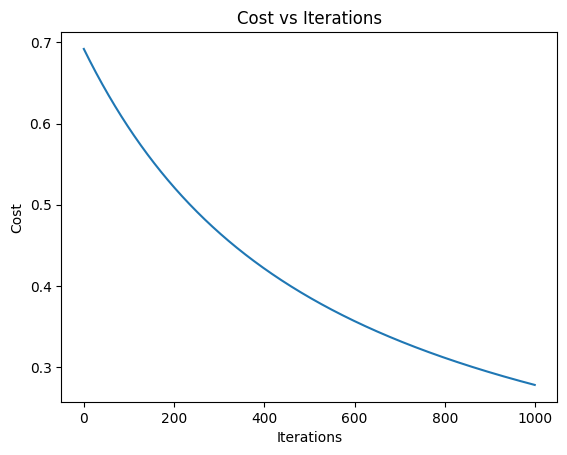

In [28]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()

[-0.78197306 -0.34086005 -1.13486347  0.27669816 -1.39953127 -0.25263745
  0.98247897 -0.95841826 -0.60552786  0.71781117  1.33536938 -0.07619225
 -0.69375046  2.0411502  -1.31130867  1.51181459 -0.42908265  0.45314336
 -1.04664087  1.77648239 -0.16441485  0.10025296]
[-1.19089486 -0.62133645 -0.05177804 -1.19089486  1.08733878 -0.62133645
 -1.19089486  1.65689719 -0.05177804 -0.62133645 -0.05177804  0.51778037
 -1.19089486 -1.19089486  2.2264556  -0.62133645  1.08733878 -0.05177804
 -0.05177804 -0.05177804  1.65689719  0.51778037]


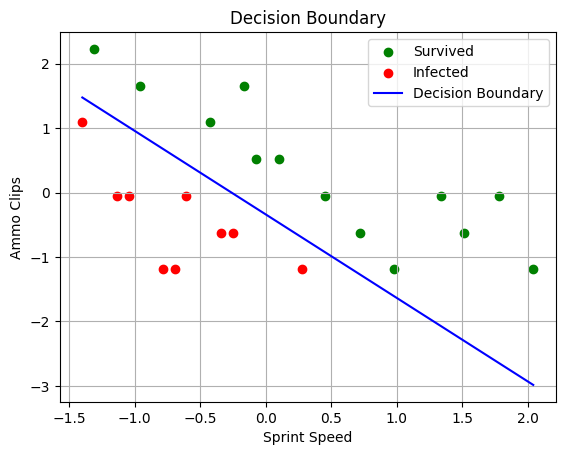

In [40]:
#Decision Boundary Plot
speed = x_final[:, 1]
ammo  = x_final[:, 2]
print(speed)
print(ammo)
survived = (y==1)
infected = (y==0)
plt.scatter(speed[survived], ammo[survived], c="g", label="Survived")
plt.scatter(speed[infected], ammo[infected], c="r", label="Infected")
w0, w1, w2 = W[0], W[1], W[2]

x_vals = np.linspace(speed.min(), speed.max(), 100)
y_vals = -(w0 + w1 * x_vals) / w2

plt.plot(x_vals, y_vals, color="b", label="Decision Boundary")
plt.xlabel("Sprint Speed")
plt.ylabel("Ammo Clips")
plt.title("Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()